In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [8]:
# Load the first dataset
separable_dataset_path = "A2-ring/A2-ring-separable.txt"
separable_dataset = pd.read_csv(separable_dataset_path, sep="\t", header=None)

# Load the second dataset
merged_dataset_path = "A2-ring/A2-ring-merged.txt"
merged_dataset = pd.read_csv(merged_dataset_path, sep="\t", header=None)

# Load the test dataset
test_dataset_path = "A2-ring/A2-ring-test.txt"
test_dataset = pd.read_csv(test_dataset_path, sep="\t", header=None)
# Load data
def load_data(file_path):
    data = np.loadtxt(file_path)
    X, y = data[:, :-1], data[:, -1]
    return X, y

# Load the datasets
X_sep, y_sep = load_data("A2-ring/A2-ring-separable.txt")
X_mer, y_mer = load_data("A2-ring/A2-ring-merged.txt")
X_test, y_test = load_data("A2-ring/A2-ring-test.txt")

# Split the data into training and validation sets for the separable dataset
X_train_sep, X_val_sep, y_train_sep, y_val_sep = train_test_split(X_sep, y_sep, test_size=0.2, random_state=42)

# Split the data into training and test sets for merged dataset
X_train_mer, X_val_mer, y_train_mer, y_val_mer = train_test_split(X_mer, y_mer, test_size=0.2, random_state=42)



In [9]:
# Function to apply MLR and convert predictions into class labels
def apply_mlr(X_train, y_train, X_test, y_test):
    # Create a linear regression model
    mlr = LinearRegression()

    # Train the model
    mlr.fit(X_train, y_train)

    # Make predictions
    y_pred_cont = mlr.predict(X_test)

    # Convert continuous predictions into class labels using a threshold
    threshold = 0.5
    y_pred = (y_pred_cont > threshold).astype("int32")

    # Calculate and print accuracy
    accuracy = np.mean(y_pred == y_test)
    print("Accuracy: ", accuracy)

    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_cont)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Ring Dataset')
    plt.legend(loc="lower right")
    plt.show()

    return mlr


Multiple Linear Regression (MLR) - Ring Separable Dataset
Accuracy:  0.4665
Classification report:
              precision    recall  f1-score   support

         0.0       0.50      0.89      0.64      1051
         1.0       0.00      0.00      0.00       949

    accuracy                           0.47      2000
   macro avg       0.25      0.44      0.32      2000
weighted avg       0.26      0.47      0.33      2000

Confusion matrix:
[[933 118]
 [949   0]]
ROC AUC Score:  0.44386298763082777


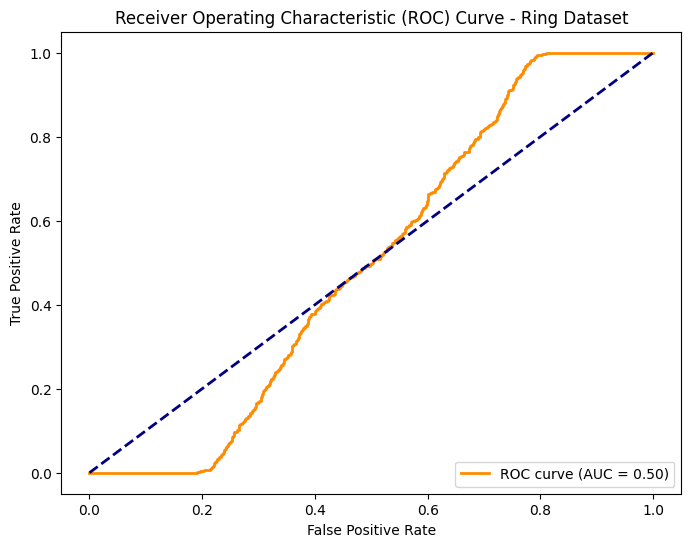


Multiple Linear Regression (MLR) - Ring Merged Dataset
Accuracy:  0.5585
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72      1117
         1.0       0.00      0.00      0.00       883

    accuracy                           0.56      2000
   macro avg       0.28      0.50      0.36      2000
weighted avg       0.31      0.56      0.40      2000

Confusion matrix:
[[1117    0]
 [ 883    0]]
ROC AUC Score:  0.5


c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

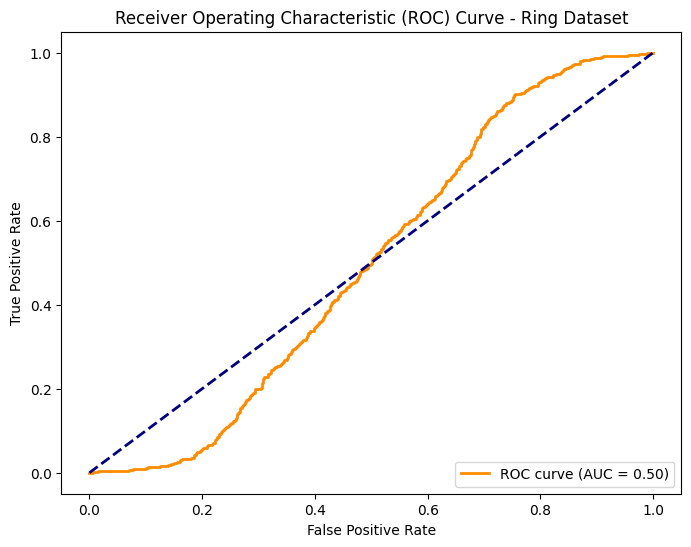


Multiple Linear Regression (MLR) - Ring Test Dataset
Accuracy:  0.5333
Classification report:
              precision    recall  f1-score   support

         0.0       0.53      1.00      0.70      5333
         1.0       0.00      0.00      0.00      4667

    accuracy                           0.53     10000
   macro avg       0.27      0.50      0.35     10000
weighted avg       0.28      0.53      0.37     10000

Confusion matrix:
[[5333    0]
 [4667    0]]
ROC AUC Score:  0.5


c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

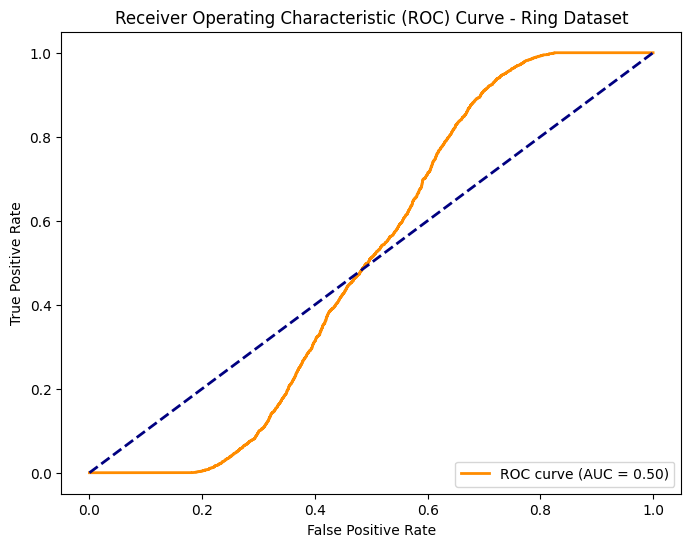

In [10]:
# Apply Multiple Linear Regression (MLR) to the Ring dataset
print("\nMultiple Linear Regression (MLR) - Ring Separable Dataset")
mlr_sep = apply_mlr(X_train_sep, y_train_sep, X_val_sep, y_val_sep)

print("\nMultiple Linear Regression (MLR) - Ring Merged Dataset")
mlr_mer = apply_mlr(X_train_mer, y_train_mer, X_val_mer, y_val_mer)

# Apply MLR to the test dataset
print("\nMultiple Linear Regression (MLR) - Ring Test Dataset")
mlr_test = apply_mlr(X_train_mer, y_train_mer, X_test, y_test)